In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Считаем два датасета

In [3]:
df1 = pd.read_parquet('source1.pq', engine='fastparquet')
df2 = pd.read_parquet('source2.pq', engine='fastparquet')

In [4]:
df1.shape, df2.shape

((219013, 15), (279732, 15))

In [5]:
df1.sample(5)

,date,id,Population,age,educ,famSize,occupation,sex,work,ageGroup,tvStartTime,tvEndTime,duration,productid,channel
13568,2023-02-23,235,3.496435,39,high,4+ persons,manager,male,yes,35-44,2023-02-23 20:19:51,2023-02-23 20:22:25,154.0,1860.0,СВ: РОССИЯ 24 (СЕТЕВОЕ ВЕЩАНИЕ)
148291,2023-02-26,435,12.676042,33,high,3 persons,specialists,female,yes,25-34,2023-02-26 09:35:34,2023-02-26 09:39:37,243.0,1872.0,СВ: ТВ-3 (СЕТЕВОЕ ВЕЩАНИЕ)
158320,2023-02-28,240,5.497091,56,high,1-2 persons,other unemployed,female,no,55-64,2023-02-28 23:08:05,2023-02-28 23:08:28,23.0,4871.0,КА: МОСКВА. ДОВЕРИЕ (МОСКВА)
179880,2023-02-28,379,8.791782,33,high,4+ persons,other unemployed,female,no,25-34,2023-02-28 10:55:16,2023-02-28 11:28:25,1989.0,2334.0,СВ: TV 1000 РУССКОЕ КИНО (СЕТЕВОЕ ВЕЩАНИЕ)
62792,2023-02-26,278,3.625229,37,high,1-2 persons,employees,female,yes,35-44,2023-02-26 08:54:32,2023-02-26 08:57:31,179.0,3311.0,КА: НТВ (МОСКВА)


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219013 entries, 0 to 219012
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         219013 non-null  datetime64[ns]
 1   id           219013 non-null  int32         
 2   Population   219013 non-null  float64       
 3   age          219013 non-null  int32         
 4   educ         219013 non-null  object        
 5   famSize      219013 non-null  object        
 6   occupation   219013 non-null  object        
 7   sex          219013 non-null  object        
 8   work         219013 non-null  object        
 9   ageGroup     219013 non-null  object        
 10  tvStartTime  214649 non-null  datetime64[us]
 11  tvEndTime    214649 non-null  datetime64[us]
 12  duration     214649 non-null  float64       
 13  productid    214649 non-null  float64       
 14  channel      214649 non-null  object        
dtypes: datetime64[ns](1), datetime64[u

In [7]:
df2.sample(5)

,date,id,Population,age,educ,famSize,occupation,sex,work,ageGroup,tvStartTime,tvEndTime,duration,productid,channel
101539,2023-02-24,94,5.675826,73,высшее,2 человека в семье,др. неработающие,Мужчины,не работает,65+,2023-02-24 13:38:00,2023-02-24 13:38:59,59.0,975.0,МАТЧ ТВ
128409,2023-02-24,99,2.490410,71,высшее,2 человека в семье,др. неработающие,Мужчины,не работает,65+,2023-02-24 17:39:00,2023-02-24 17:39:59,59.0,11003.0,Измеряемое локальное ТВ
55903,2023-02-28,122,12.494556,55,среднее,2 человека в семье,специалисты,Мужчины,работает,55-64,2023-02-28 05:00:00,2023-02-28 05:20:59,1259.0,1862.0,НТВ
80752,2023-02-26,86,1.789020,61,высшее,1 человек в семье,др. неработающие,Мужчины,не работает,55-64,2023-02-26 11:40:00,2023-02-26 11:40:59,59.0,2036.0,ЕДИНЫЙ РЕКЛАМНЫЙ КАНАЛ
141716,2023-02-26,966,16.979708,65,среднее,4+ человека в семье,др. неработающие,Женщины,не работает,65+,2023-02-26 13:57:00,2023-02-26 13:58:59,119.0,11003.0,Измеряемое локальное ТВ


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279732 entries, 0 to 279731
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         279732 non-null  datetime64[ns]
 1   id           279732 non-null  int32         
 2   Population   279732 non-null  float64       
 3   age          279732 non-null  object        
 4   educ         279732 non-null  object        
 5   famSize      279732 non-null  object        
 6   occupation   279732 non-null  object        
 7   sex          279732 non-null  object        
 8   work         279732 non-null  object        
 9   ageGroup     279732 non-null  object        
 10  tvStartTime  273495 non-null  datetime64[us]
 11  tvEndTime    273495 non-null  datetime64[us]
 12  duration     273495 non-null  float64       
 13  productid    273495 non-null  float64       
 14  channel      273495 non-null  object        
dtypes: datetime64[ns](1), datetime64[u

## Соединение данных

В каждом датасете есть отличающиеся значения, приведем их к одному виду

In [11]:
import re
def fun(text):
    pattern = r'^[А-Я]{2}:\s*(.*?)\s*\('
    match = re.search(pattern, text)
    result = match.group(1)  # Извлекаем первую группу
    return result

In [12]:
df1.loc[df1['channel'].notnull(), 'channel'] = df1.loc[df1['channel'].notnull(), 'channel'].apply(fun)

In [13]:
df2['age'] = df2['age'].astype(int)

In [14]:
df2['educ'].unique()

array(['среднее', 'высшее'], dtype=object)

In [15]:
df2['educ'] = df2['educ'].map({'среднее':'medium','высшее':'high'})

In [16]:
df2['famSize'].unique()

array(['2 человека в семье', '4+ человека в семье', '3 человека в семье',
       '1 человек в семье'], dtype=object)

In [17]:
df2['famSize'] = df2['famSize'].map({'2 человека в семье':'1-2 persons','4+ человека в семье':'4+ persons',
                                     '3 человека в семье':'3 persons','1 человек в семье':'1-2 persons'})

In [18]:
df1['occupation'].unique()

array(['other unemployed', 'manager', 'workers', 'employees',
       'specialists', 'housewives', 'NA', 'students'], dtype=object)

In [19]:
df2['occupation'].unique()

array(['рабочие', 'служащие', 'специалисты', 'др. неработающие',
       'учащиеся', 'руководители', 'домохозяйки'], dtype=object)

In [20]:
df2['occupation'] = df2['occupation'].map({'рабочие':'workers', 'служащие':'employees', 'специалисты':'specialists', 'др. неработающие':'NA',
       'учащиеся':'students', 'руководители':'manager', 'домохозяйки':'housewives'})

In [21]:
df2['sex'] = df2['sex'].map({'Женщины':'female','Мужчины':'male'})

In [22]:
df2['work'] = df2['work'].map({'не работает':'no','работает':'yes'})

In [23]:
df2.sample(5)

,date,id,Population,age,educ,famSize,occupation,sex,work,ageGroup,tvStartTime,tvEndTime,duration,productid,channel
153206,2023-02-28,411,3.607658,60,high,1-2 persons,manager,female,yes,55-64,2023-02-27 21:38:00,2023-02-27 21:39:59,119.0,1859.0,РОССИЯ 1
164830,2023-02-28,202,5.590509,54,medium,1-2 persons,specialists,male,yes,45-54,2023-02-28 02:48:00,2023-02-28 03:14:59,1619.0,11000.0,Измеряемое тематическое ТВ
239583,2023-02-27,252,6.633447,57,high,1-2 persons,employees,female,yes,55-64,2023-02-27 14:29:00,2023-02-27 14:30:59,119.0,1863.0,РОССИЯ К
155731,2023-02-23,5,6.989624,71,high,4+ persons,NA,male,no,65+,2023-02-23 17:40:00,2023-02-23 17:47:59,479.0,1877.0,ПЯТЫЙ КАНАЛ
273373,2023-02-24,390,6.980173,46,high,4+ persons,NA,female,yes,45-54,2023-02-24 18:07:00,2023-02-24 18:12:59,359.0,1870.0,ТНТ


Объединяем два датасета

In [25]:
df = pd.concat([df1,df2], axis=0, ignore_index=True)

In [26]:
df.sample(5)

,date,id,Population,age,educ,famSize,occupation,sex,work,ageGroup,tvStartTime,tvEndTime,duration,productid,channel
441958,2023-02-26,161,16.979708,65,medium,4+ persons,NA,female,no,65+,2023-02-26 14:40:00,2023-02-26 14:41:59,119.0,11003.0,Измеряемое локальное ТВ
328166,2023-02-23,176,1.439455,64,high,1-2 persons,NA,female,no,55-64,2023-02-22 23:08:00,2023-02-22 23:14:59,419.0,11000.0,Измеряемое тематическое ТВ
278748,2023-02-24,393,7.086341,65,high,4+ persons,manager,male,yes,65+,2023-02-24 11:54:00,2023-02-24 12:05:59,719.0,1877.0,ПЯТЫЙ КАНАЛ
303019,2023-02-25,688,4.608235,68,high,1-2 persons,NA,female,no,65+,2023-02-25 05:44:00,2023-02-25 05:44:59,59.0,1860.0,РОССИЯ 24
215933,2023-02-25,1733,19.738874,23,medium,1-2 persons,specialists,male,yes,18-24,NaT,NaT,NaN,NaN,None


In [27]:
df["day"] = df["tvStartTime"].dt.to_period("D")

Ниже видно, что есть данные и по 21 число (в полях tvStartTime и tvEndTime), хотя они относятся к 22 числу (по полю date), скорее всего это является ошибкой, удалим их

In [29]:
day = '2023-02-21'
df[(df['day'] == day)].sample(5)

,date,id,Population,age,educ,famSize,occupation,sex,work,ageGroup,tvStartTime,tvEndTime,duration,productid,channel,day
446108,2023-02-22,865,4.361541,14,medium,1-2 persons,students,female,no,12-17,2023-02-21 22:18:00,2023-02-21 22:40:59,1379.0,1859.0,РОССИЯ 1,2023-02-21
303942,2023-02-22,2,6.378565,60,medium,1-2 persons,NA,male,no,55-64,2023-02-21 21:51:00,2023-02-21 21:52:59,119.0,11000.0,Измеряемое тематическое ТВ,2023-02-21
309380,2023-02-22,211,6.963994,54,medium,4+ persons,NA,female,no,45-54,2023-02-21 21:31:00,2023-02-21 21:31:59,59.0,2236.0,ДОМ КИНО,2023-02-21
491681,2023-02-22,1495,4.868814,51,medium,3 persons,NA,female,no,45-54,2023-02-21 21:49:00,2023-02-21 21:50:59,119.0,11003.0,Измеряемое локальное ТВ,2023-02-21
296526,2023-02-22,1738,5.499760,47,high,3 persons,manager,male,yes,45-54,2023-02-21 21:50:00,2023-02-21 22:15:59,1559.0,12319.0,OTHER TV SET,2023-02-21


In [30]:
df[(df['day'] == day)].shape

(2287, 16)

In [31]:
ind = df[(df['day'] == day)].index
df.drop(ind, inplace=True)

Посмотрим на пропуски в данных

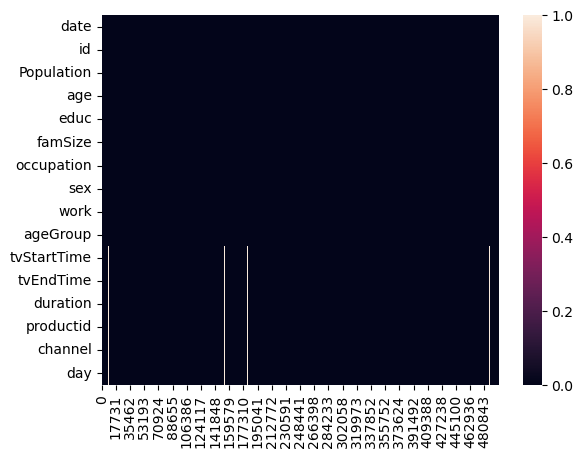

In [33]:
sns.heatmap(df.isna().T)
plt.show()

## Изучение числовых признаков

In [35]:
from pandas.api.types import is_numeric_dtype

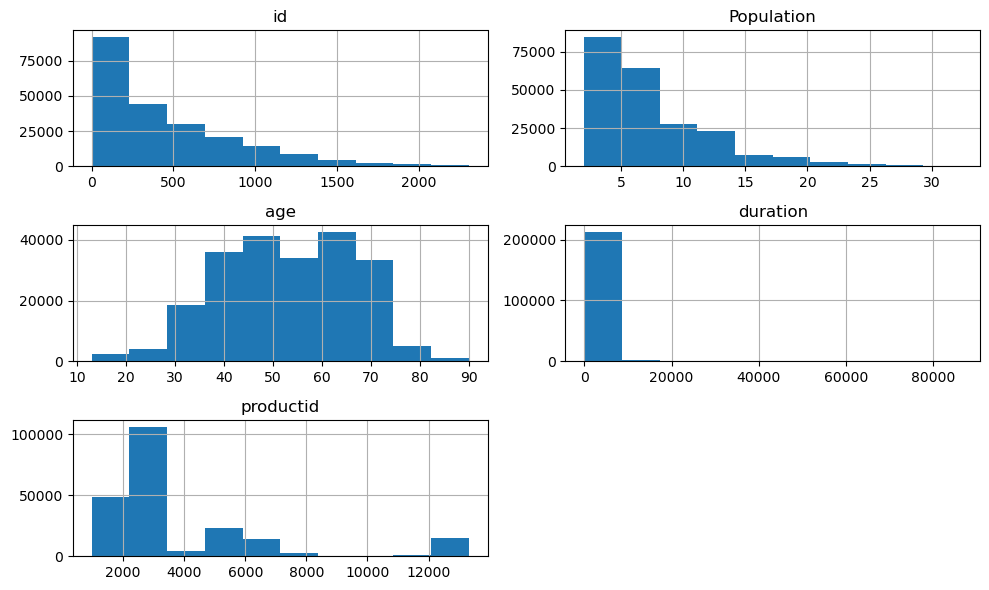

In [36]:
num_cols = [x for x in df1.columns if is_numeric_dtype(df[x])]
df1[num_cols].hist(figsize=(10,6))
plt.tight_layout()
plt.show()

Изучим выбросы в призаке duration

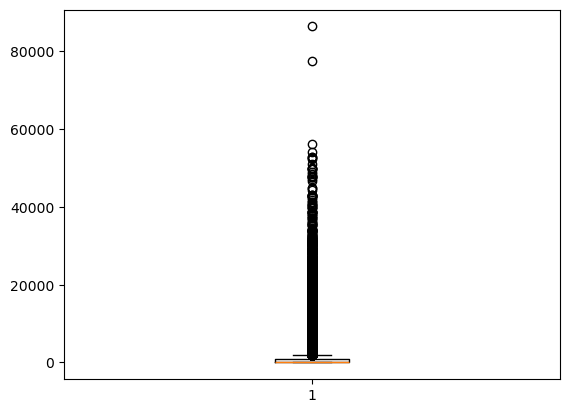

In [38]:
plt.boxplot(df[~df['duration'].isna()]['duration'])
plt.show()

In [39]:
df[df['duration']>43200].shape

(26, 16)

In [40]:
df[df['id']==121].sample(40)

,date,id,Population,age,educ,famSize,occupation,sex,work,ageGroup,tvStartTime,tvEndTime,duration,productid,channel,day
270446,2023-02-27,121,3.455934,67,high,4+ persons,NA,female,no,65+,2023-02-27 06:14:00,2023-02-27 06:15:59,119.0,11003.0,Измеряемое локальное ТВ,2023-02-27
270517,2023-02-27,121,3.455934,67,high,4+ persons,NA,female,no,65+,2023-02-27 19:07:00,2023-02-27 19:07:59,59.0,4536.0,СТС LOVE,2023-02-27
159550,2023-02-26,121,2.767292,45,high,1-2 persons,NA,male,yes,45-54,2023-02-26 14:19:42,2023-02-26 14:20:05,23.0,3312.0,РОССИЯ К,2023-02-26
270250,2023-02-22,121,3.434088,67,high,4+ persons,NA,female,no,65+,2023-02-22 16:44:00,2023-02-22 16:44:59,59.0,11003.0,Измеряемое локальное ТВ,2023-02-22
159638,2023-02-27,121,2.531662,45,high,1-2 persons,NA,male,yes,45-54,2023-02-27 22:09:25,2023-02-27 22:14:48,323.0,1860.0,РОССИЯ 24,2023-02-27
159493,2023-02-23,121,2.944069,45,high,1-2 persons,NA,male,yes,45-54,2023-02-23 17:18:34,2023-02-23 18:04:51,2777.0,3320.0,ПЯТНИЦА,2023-02-23
270290,2023-02-23,121,3.500384,67,high,4+ persons,NA,female,no,65+,2023-02-23 07:12:00,2023-02-23 07:13:59,119.0,11003.0,Измеряемое локальное ТВ,2023-02-23
159603,2023-02-26,121,2.767292,45,high,1-2 persons,NA,male,yes,45-54,2023-02-26 19:14:42,2023-02-26 19:15:18,36.0,5074.0,МОСКВА-24,2023-02-26
270391,2023-02-25,121,3.536351,67,high,4+ persons,NA,female,no,65+,2023-02-25 20:23:00,2023-02-25 20:51:59,1739.0,1862.0,НТВ,2023-02-25
159406,2023-02-22,121,2.980372,45,high,1-2 persons,NA,male,yes,45-54,2023-02-22 16:31:23,2023-02-22 16:31:35,12.0,3301.0,МАТЧ! СТРАНА,2023-02-22


Будем предполагать, что продолжительность просмотра более 12 часов - неинформативные данные, поскольку вряд ли человек будет смотреть телевизор более 12 часов не отрываясь, потому удалим эти образцы

In [42]:
index = df[df['duration']>43200].index
df.drop(index, inplace=True)

Проверим корреляцию числовых признаков

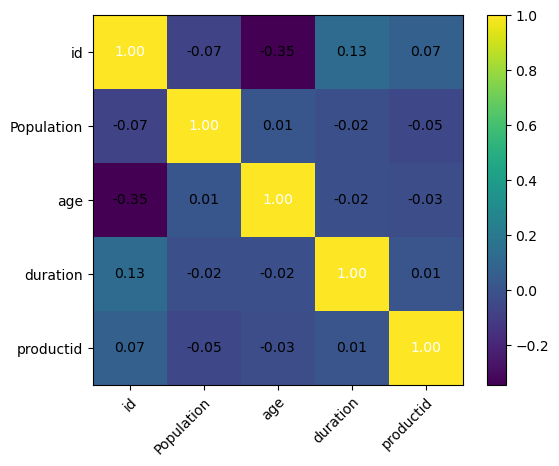

In [44]:
from mlxtend.plotting import heatmap
cm = np.corrcoef(df[df['productid'].notnull()][num_cols].values.T)
gm = heatmap(cm, row_names=num_cols, column_names=num_cols)
plt.show()

## Изучение категориальных данных

In [46]:
cat_col = ['educ','famSize','occupation','sex','work','ageGroup']

Выведем частоту появление категориальных признаках в образцах

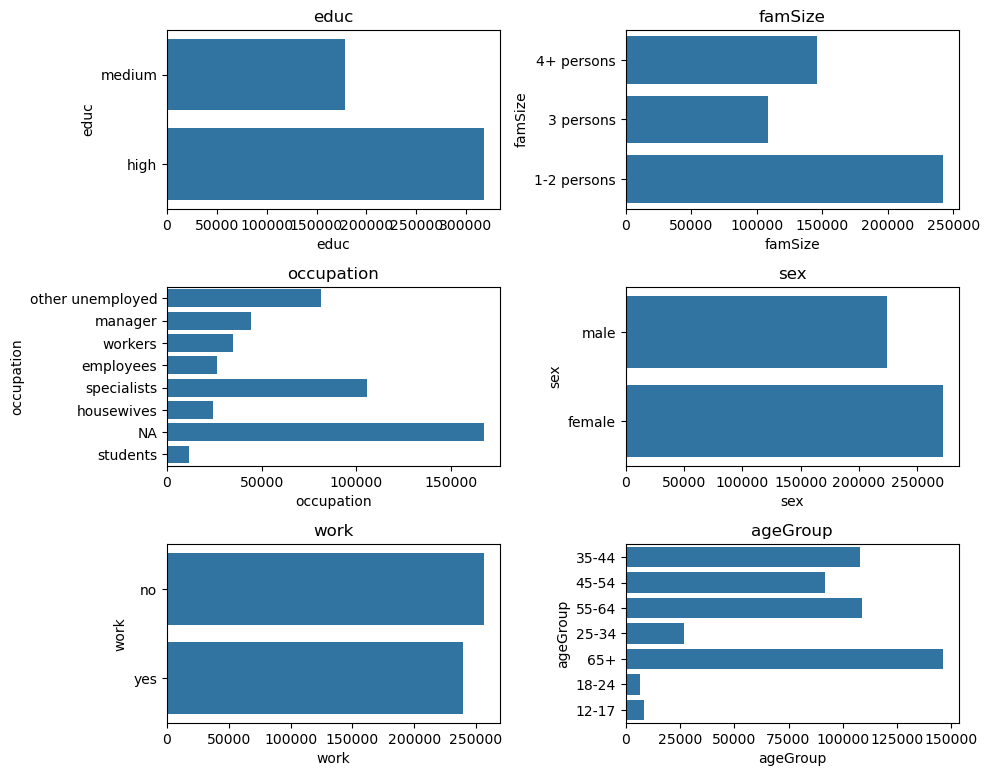

In [48]:
plt.figure(figsize=(10,10))
plotnumber = 1
for cat_feature in cat_col:
    ax = plt.subplot(4,2,plotnumber)
    sns.countplot(y=cat_feature,data=df)
    plt.xlabel(cat_feature)
    plt.title(cat_feature)
    plt.tight_layout()
    plotnumber+=1
plt.show()

Выведем соотношение значений каждого категориального признака у уникальных пользователей (в каждом id может быть несколько уникальных пользователей)

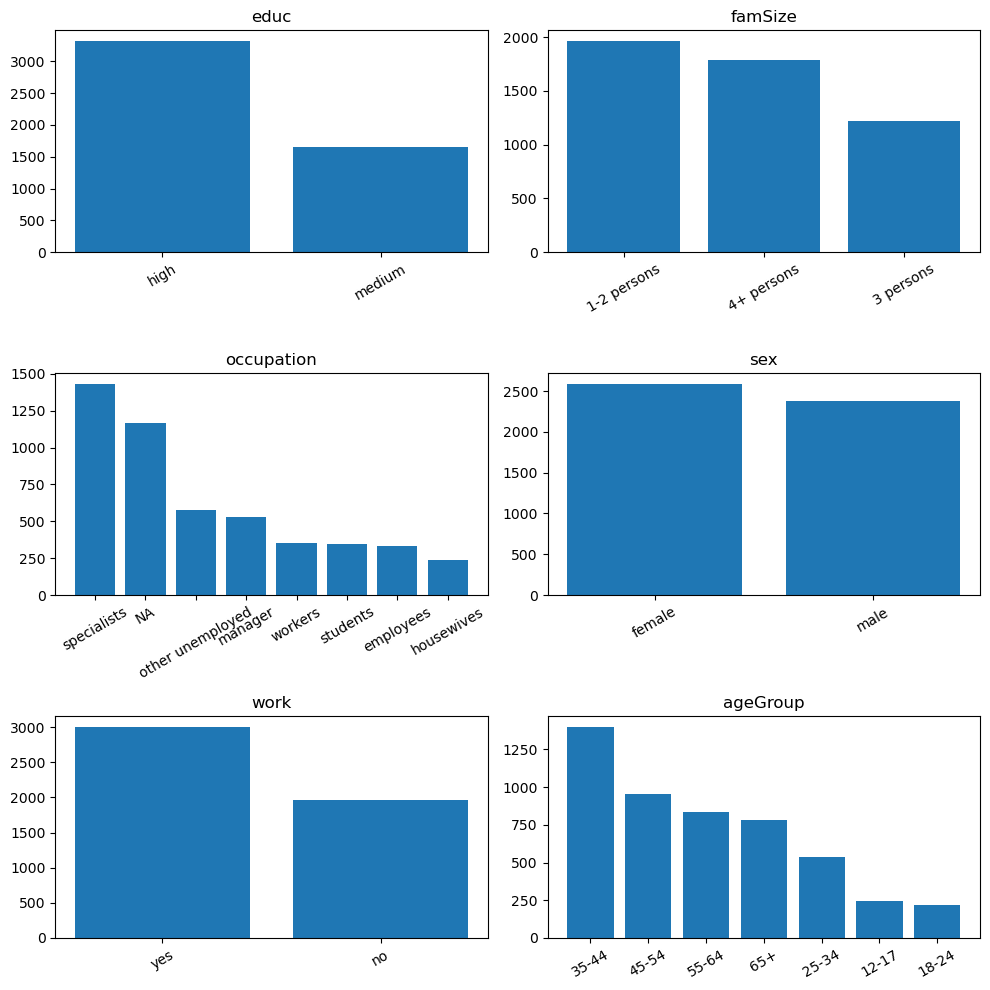

In [50]:
plt.figure(figsize=(10,10))
plotnumber = 1
for cat_feature in cat_col:
    data = pd.DataFrame(df.drop_duplicates(subset=['id','age','sex','occupation','work'])[cat_feature].value_counts(), columns=['count']).reset_index()
    ax = plt.subplot(3,2,plotnumber)
    ax.bar(data[cat_feature],data['count'])
    plt.title(cat_feature)
    plt.xticks(rotation = 30) 
    plt.tight_layout()
    plotnumber += 1

Посмотрим самые часто включаемые респодентами каналы

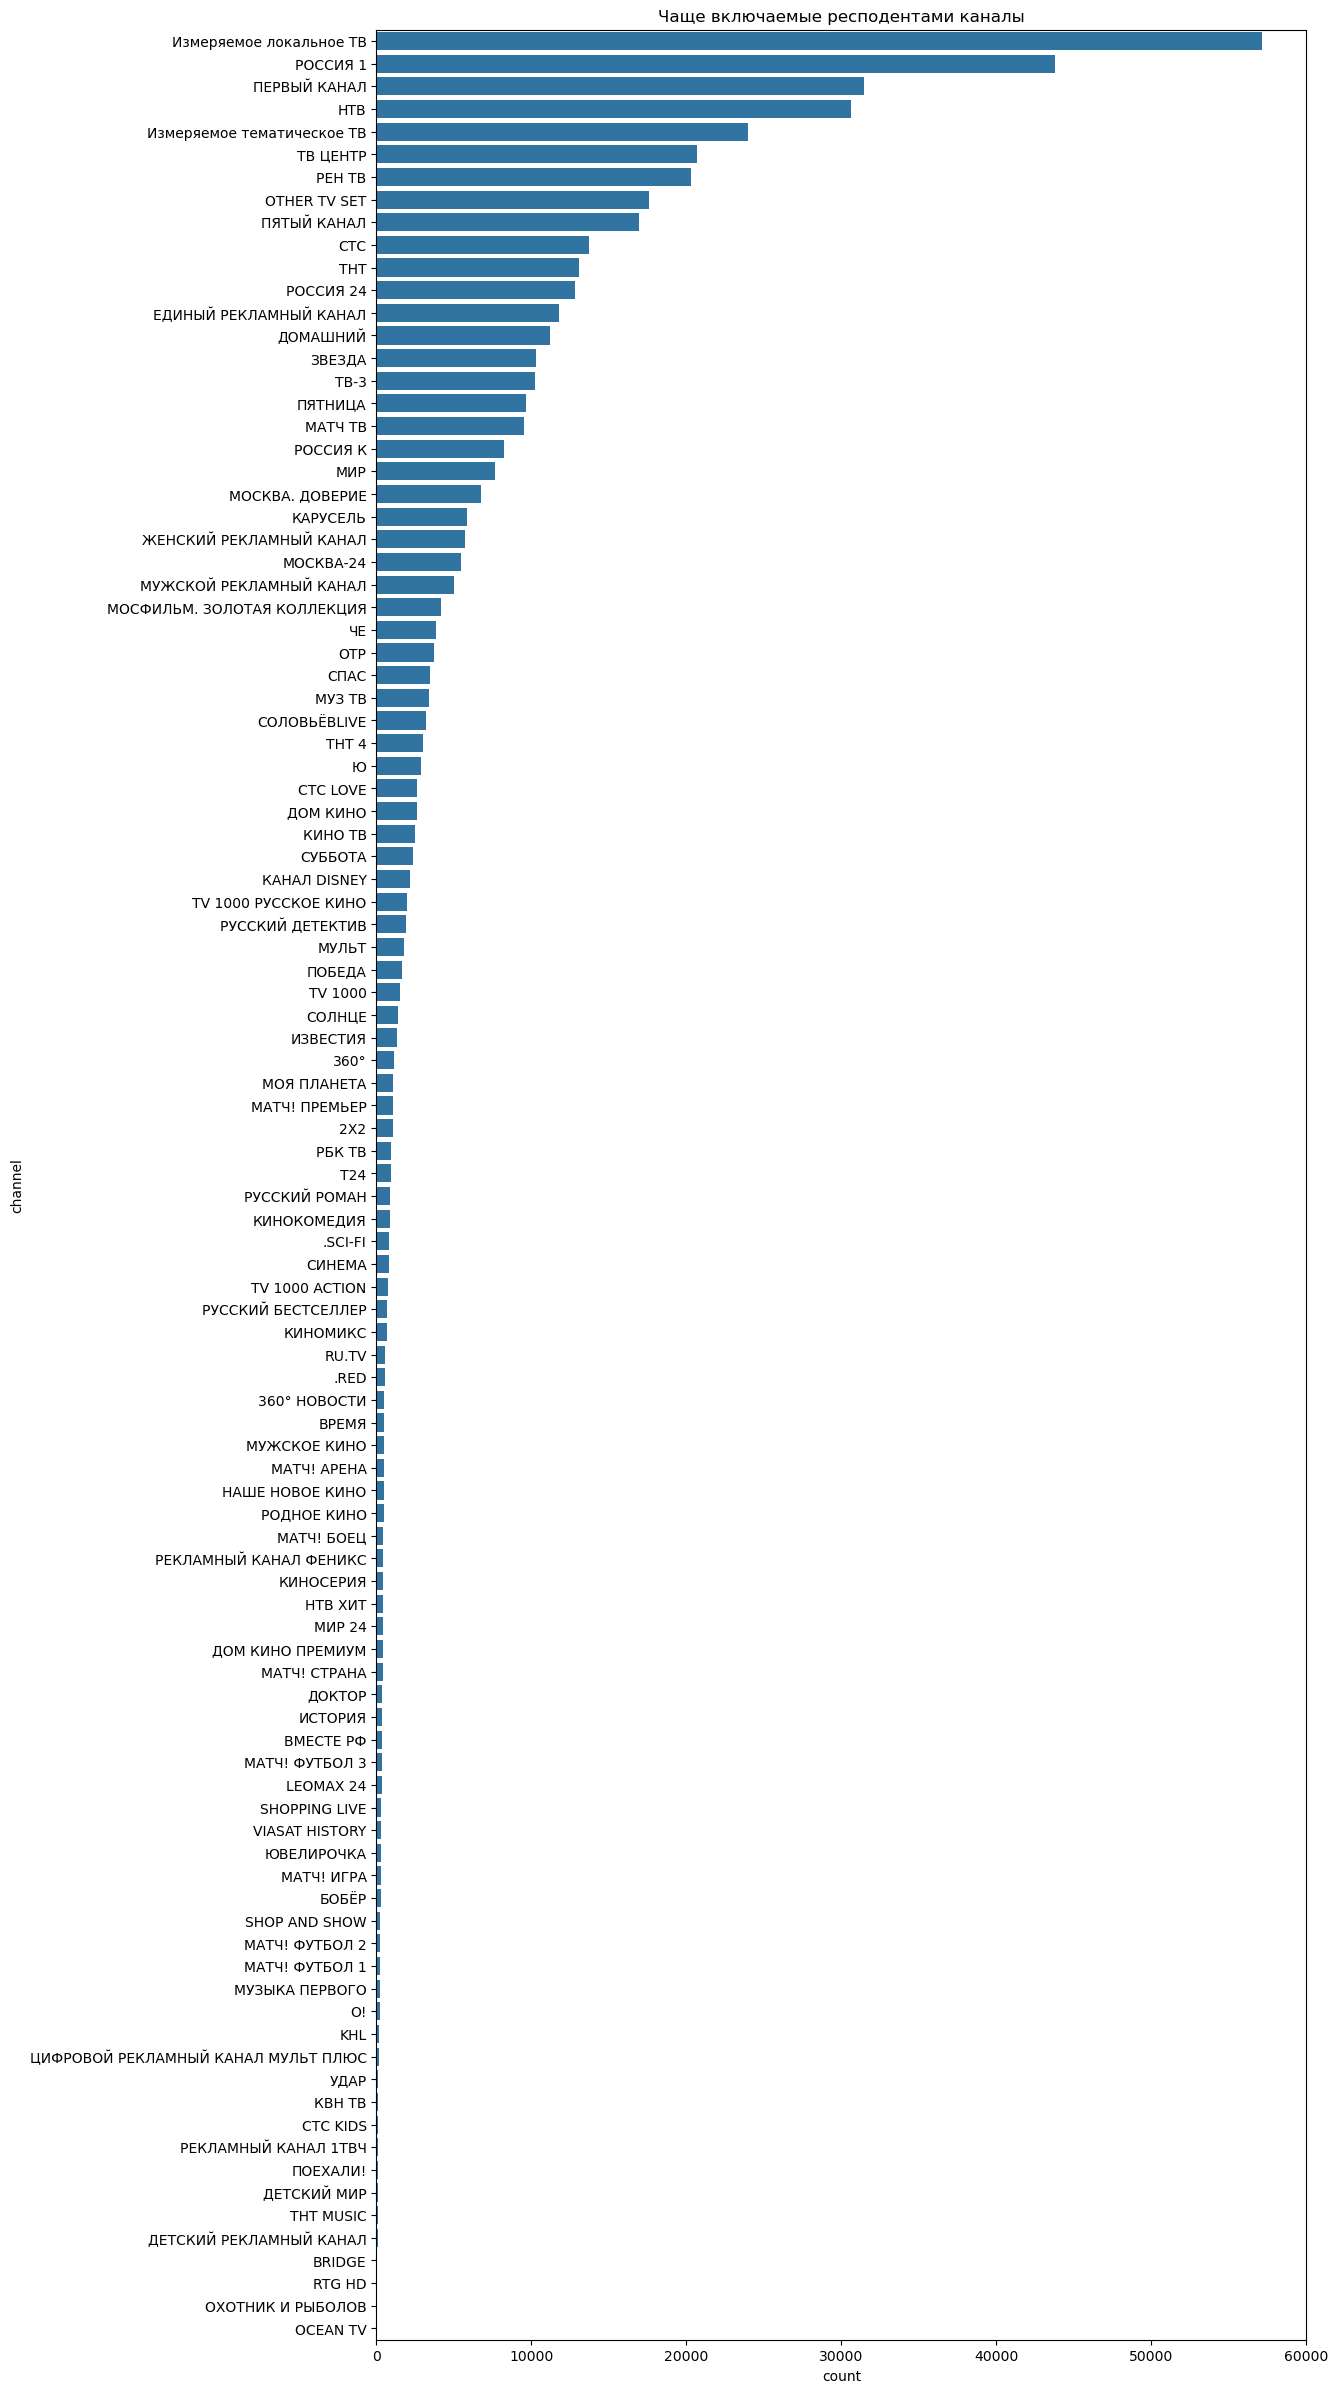

In [52]:
plt.figure(figsize=(12,30))
sns.countplot(y='channel',data=df,order = df['channel'].value_counts().index)
plt.title('Чаще включаемые респодентами каналы')
plt.show()

## Метрики по каналу "Звезда"

Будем изучать основные метрики на канале "Звезда"

In [54]:
print(df[df['channel'] == 'ЗВЕЗДА'].shape)

(10301, 16)


In [55]:
days = np.array([str(x) for x in df['day'].unique()])
days = np.delete(np.array(days), 7)
daily_reach = {}
for day in days:
    day_reach = df[(df['channel'] == 'ЗВЕЗДА') & (df['day'] == day)].drop_duplicates(subset=['id'])['Population'].sum()
    daily_reach[day] = day_reach

In [56]:
#print(*sorted(daily_reach.items()),sep='\n')

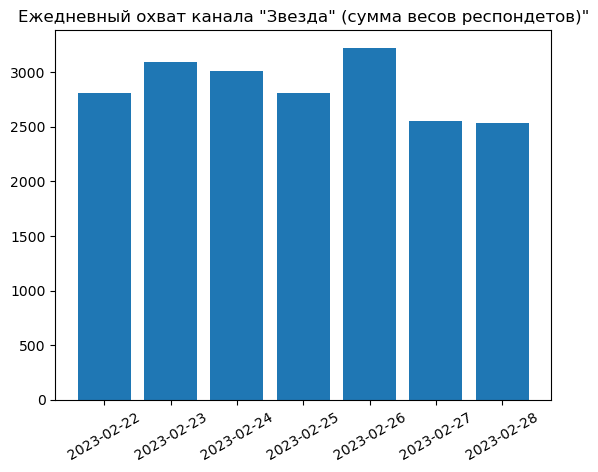

In [57]:
plt.bar(*zip(*daily_reach.items()))
plt.xticks(rotation = 30)
plt.title('Ежедневный охват канала "Звезда" (сумма весов респондетов)"')
plt.show()

Общая тенденция охвата канала "Звезда" - снижение, за исключением одного дня - воскресенья, который имеет максимально большой охват за все дни

In [59]:
weekly_reach = df[df['channel'] == 'ЗВЕЗДА'].drop_duplicates(subset=['id','day'])['Population'].mean() / 7

In [60]:
print('Cумма средних весов респондентов за период, которые хотя бы один раз смотрели канал "Звезда" с 22 по 28 число:\n',weekly_reach)

Cумма средних весов респондентов за период, которые хотя бы один раз смотрели канал "Звезда" с 22 по 28 число:
 0.9427843197646448


In [61]:
average_viewing = {}
for day in days: 
    
    sum_multiplications = df[(df['channel'] == 'ЗВЕЗДА')&(df['day'] == day)].apply(
        lambda x: x['duration']* x['Population'], axis=1).sum()

    sum_weights =  df[(df['channel'] == 'ЗВЕЗДА')&(df['day'] == day)]['Population'].sum()
    average_viewing[day] = sum_multiplications /  sum_weights  

In [62]:
#print(*sorted(average_viewing.items()),sep='\n')

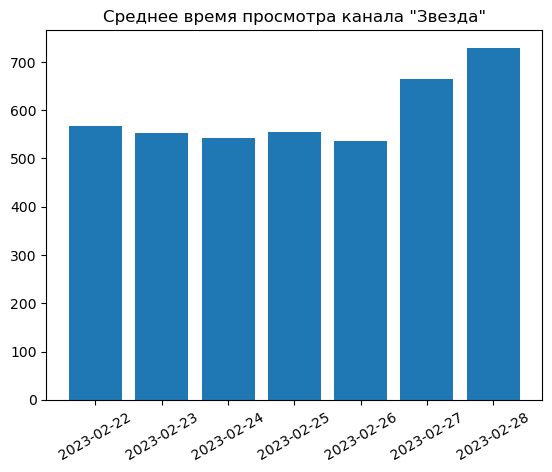

In [63]:
plt.bar(*zip(*average_viewing.items()))
plt.xticks(rotation = 30)
plt.title('Среднее время просмотра канала "Звезда"')
plt.show()

## Изучение общих тенденций

In [64]:
count_respondent = df['id'].unique().shape[0]

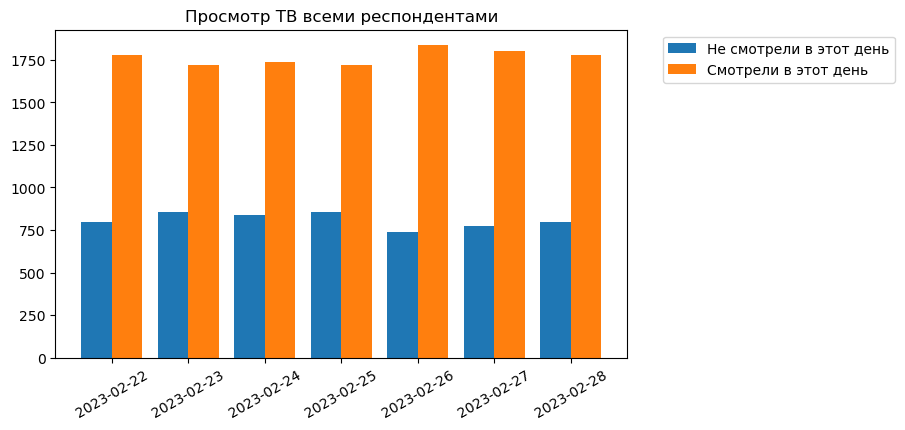

In [65]:
plotnumber = 1
plt.figure(figsize=(15, 20))
data = df[df['day'].notnull()].drop_duplicates(subset=['id','day']).groupby('day').agg({'date':'count'})
ax = plt.subplot(5,2,plotnumber)
n_ticks = np.arange(len(data['date']))
offset = 0.2
w = 0.4
ax.bar(n_ticks - offset, count_respondent - data['date'], width=w)
ax.bar(n_ticks + offset, data['date'], width=w)

plt.title('Просмотр ТВ всеми респондентами')
ax.legend(['Не смотрели в этот день', 'Смотрели в этот день'],loc='upper left',bbox_to_anchor=(1.05, 1.0))
plt.xticks(n_ticks, data.index, rotation = 30) 
plt.tight_layout()
plotnumber += 1

Самый высокий просмотр ТВ респодентами произошел в воскресенье. Заметно, что интерес к ТВ возрос с воскресенья (26 числа) на будние дни, по сравнению с прошлыми буднями, возможно, это связано с упоминанием того, что респодентов "тестируют" и они решили чаще пользоваться ТВ

In [67]:
average_viewing_all = {}
for day in days: 
    
    sum_multiplications = df[(df['day'] == day)].apply(
        lambda x: x['duration']* x['Population'], axis=1).sum()

    sum_weights =  df[(df['day'] == day)]['Population'].sum()
    average_viewing_all[day] = sum_multiplications /  sum_weights  

In [68]:
#print(*sorted(average_viewing_all.items()),sep='\n')

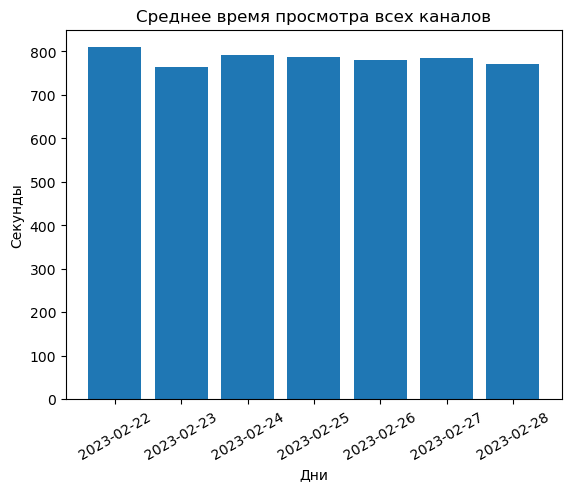

In [69]:
plt.bar(*zip(*average_viewing_all.items()))
plt.xticks(rotation = 30)
plt.title('Среднее время просмотра всех каналов')
plt.xlabel('Дни')
plt.ylabel('Секунды')
plt.show()

Тенденция среднего просмотра каждого канала особо не изменялась

В итоге:

- В будние дни (воскресенье) респоденты больше смотрят ТВ по сравнению с буднями
- Среднее время просмотра всех каналов не изменяется от будня к выходным